In [14]:
import numpy as np

In [15]:
import cv2 as cv

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
import math

In [18]:
def showImage(imageForShowing):
    plt.figure(figsize = (10, 10))
    plt.imshow(imageForShowing, 'gray')

In [19]:
def showImages(image1, image2):
    f = plt.figure(figsize = (10, 10))
    f.add_subplot(1, 1, 1)
    plt.imshow(image1, 'gray')
    f.add_subplot(1, 1, 1)
    plt.imshow(image2, 'gray')
    plt.show(block=True)

In [20]:
img = cv.imread("1.jpg", 0)

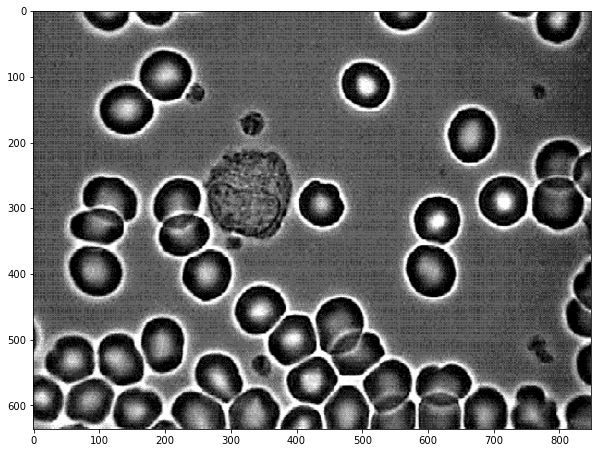

In [21]:
showImage(img)

In [22]:
imageShape = img.shape
print(imageShape)

(636, 849)


<BarContainer object of 256 artists>

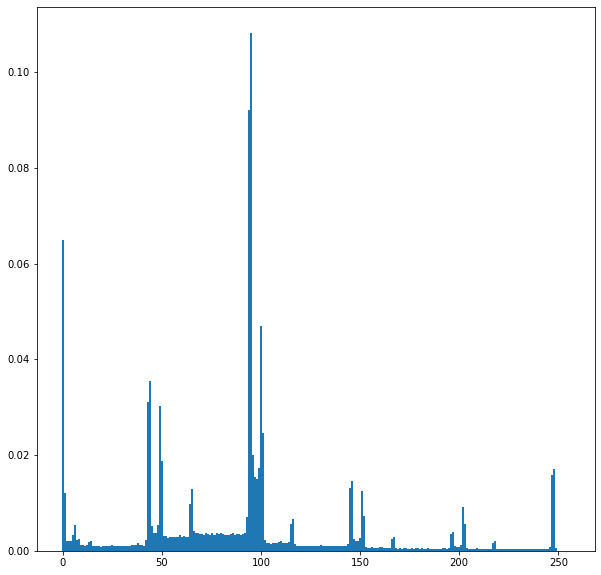

In [106]:
histoOfOriginal = CreateHisto(img)
plt.figure(figsize = (10, 10))
plt.bar(range(256), histoOfOriginal, 1)

In [23]:
#Ядро сглаживающего фильтра 5 * 5
kernel = np.ones((10, 10),np.uint16) / 100
print(kernel)

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


In [24]:
#Сглаживание определенным выше ядром
dst = cv.filter2D(img, -1, kernel)

In [25]:
def CreateHisto(image):
    r = 256
    histogramData = np.zeros(r, np.uint16)
    for i in range(imageShape[0]):
        for j in range(imageShape[1]):
            index = int(image[i, j])
            histogramData[index] = histogramData[index] + 1
    return histogramData / (imageShape[0] * imageShape[1])

<BarContainer object of 256 artists>

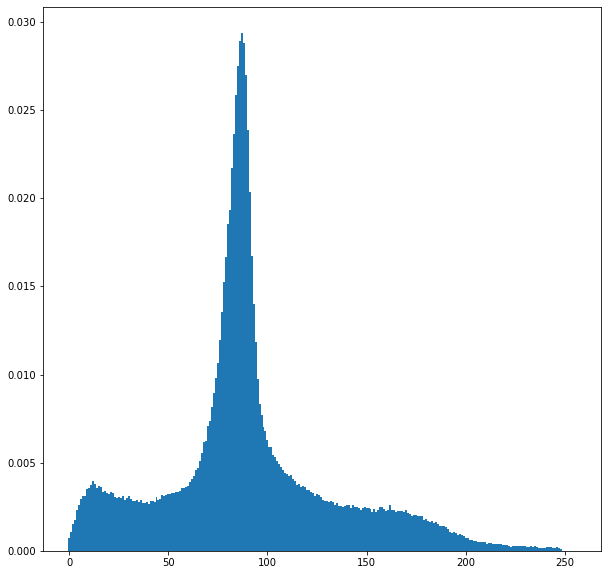

In [26]:
histoOfOriginal = CreateHisto(dst)
plt.figure(figsize = (10, 10))
plt.bar(range(256), histoOfOriginal, 1)

In [27]:
def ShowLevel(image, minValue, maxValue):
    result = np.zeros((imageShape[0], imageShape[1], 3), np.uint8)
    for i in range(imageShape[0]):
        for j in range(imageShape[1]):
            value = image[i, j]
            if value >= minValue and value <= maxValue:
                result[i, j] = [255, 0, 0]
            else:
                result[i, j] = [value, value, value]
    return result                

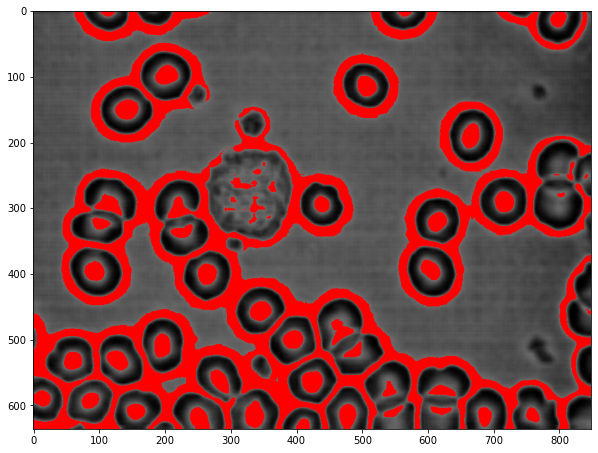

In [92]:
red1 = ShowLevel(dst, 110, 255)
plt.figure(figsize = (10, 10))
plt.imshow(red1)

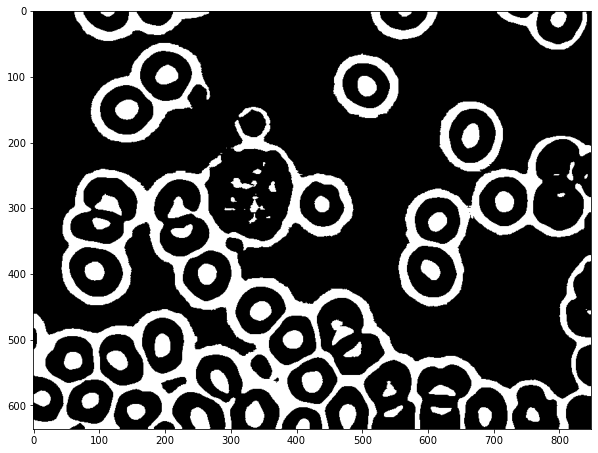

In [110]:
_, z = cv.threshold(dst, 110, 1, cv.THRESH_BINARY)
showImage(z)

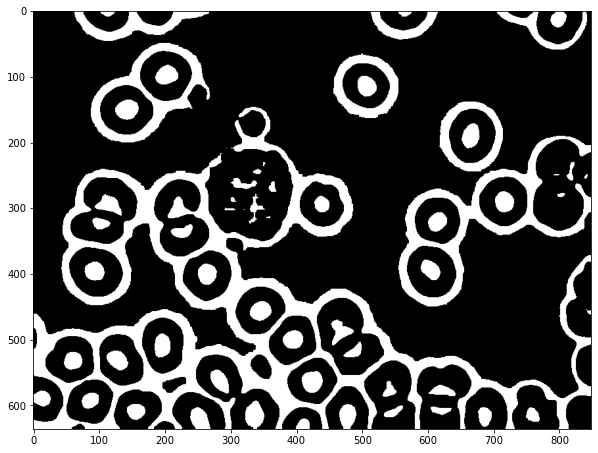

In [124]:
kernelSize = 5
kernel = np.ones((kernelSize, kernelSize), np.uint8)
closing = cv.morphologyEx(z, cv.MORPH_CLOSE, kernel)
showImage(closing)

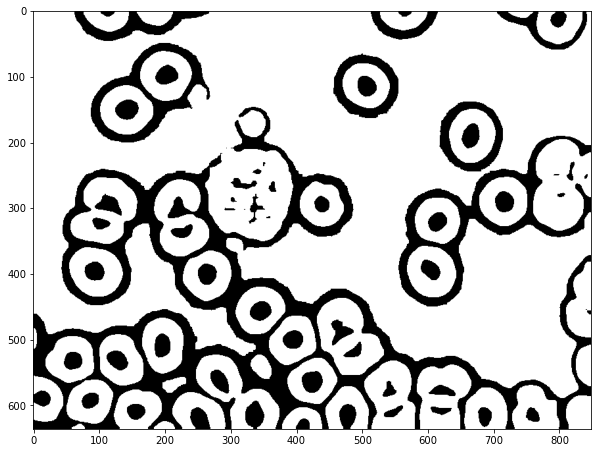

In [125]:
inverted = cv.bitwise_not(closing)
showImage(inverted)

In [133]:
_, segments = cv.threshold(inverted, 254, 1, cv.THRESH_BINARY)
#segments = ApplyThreshold(inverted, 255, 255)

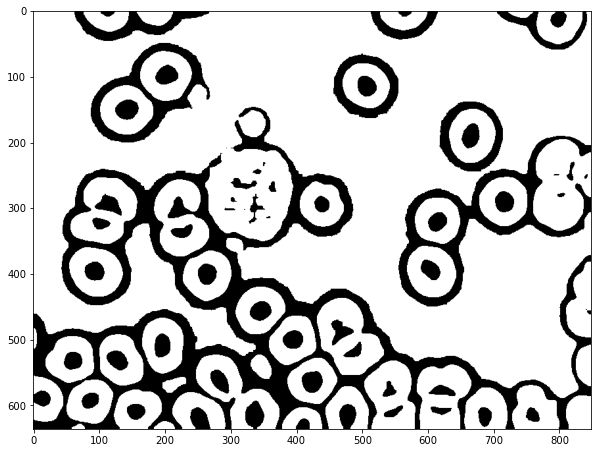

In [134]:
showImage(segments)

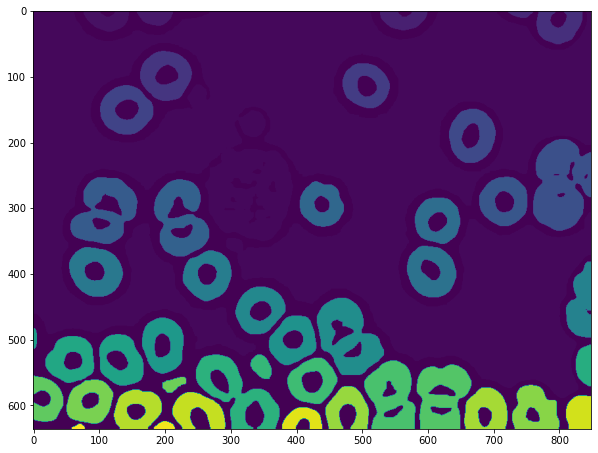

In [135]:
ret, markers = cv.connectedComponents(segments)
plt.figure(figsize = (10, 10))
plt.imshow(markers)

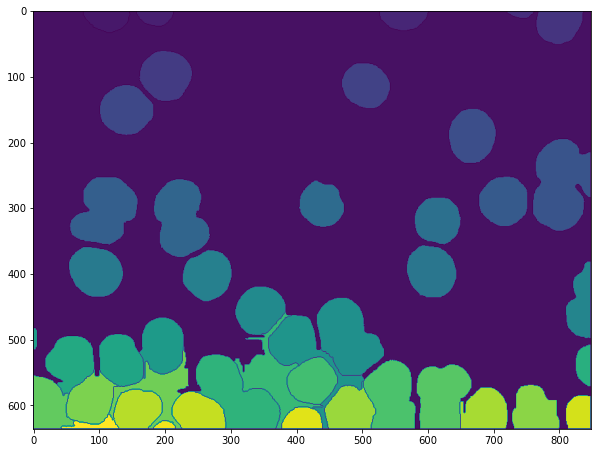

In [136]:
colorDST = cv.cvtColor(dst, cv.COLOR_GRAY2RGB)
borders = cv.watershed(colorDST, markers)
plt.figure(figsize = (10, 10))
plt.imshow(borders)

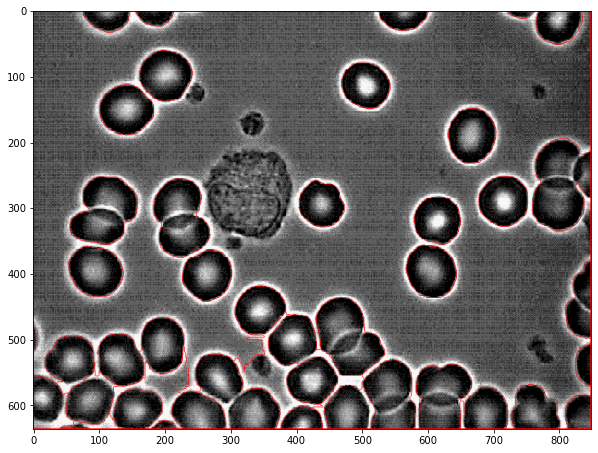

In [137]:
colorIMG = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
colorIMG[borders == -1] = [255, 0, 0]
plt.figure(figsize = (10, 10))
plt.imshow(colorIMG)

In [142]:
print('Колчиство клеток крови = ', ret - 2)

Колчиство клеток крови =  44
